<a href="https://colab.research.google.com/github/donnadietz/DonnasNotes/blob/master/pysheaf_example_1_Titan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preliminary pysheaf example
Donna Dietz - American University
April 3, 2024

This example is inspired by the "Titan" submersible which exploded
on the 18th of June in 2023.
Presume that 4  underwater sensors heard the explosion and we wish to
determine the time and location of the explosion along with the
sound propogation speed (presuming it's constant, which it isn't actually).

In [ ]:
!git clone https://github.com/kb1dds/pysheaf.git
!pip install pysheaf/

Cloning into 'pysheaf'...
remote: Enumerating objects: 1174, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1174 (delta 8), reused 15 (delta 7), pack-reused 1155
Receiving objects: 100% (1174/1174), 877.26 KiB | 11.70 MiB/s, done.
Resolving deltas: 100% (751/751), done.
Processing ./pysheaf
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00
  Created wheel for pysheaf: filename=pysheaf-0.3.1-py3-none-any.whl size=26306 sha256=4962f677d29eb9a8d9d0d68bbb370da7e0bf89da0886c5fafe56cb7547f93c5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ffwb1kw/wheels/da/21/db/aab562b5fd8399716a0c527ab0ceceda34bbebe719ae382e4e
Successfully built pysheaf


In [ ]:
#Obligatory imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pysheaf as ps

In [ ]:
#Define the sheaf cells/nodes
shf=ps.Sheaf()
shf.mNumpyNormType = 2
shf.AddCell('S1',ps.Cell('real',dataDimension=1)) # default dataDimension=1  Time ("clock") of arrival of pulse
shf.AddCell('S2',ps.Cell('real',dataDimension=1))
shf.AddCell('S3',ps.Cell('real',dataDimension=1))
shf.AddCell('S4',ps.Cell('real',dataDimension=1))
shf.AddCell('S5',ps.Cell('real',dataDimension=1))
shf.AddCell('S6',ps.Cell('real',dataDimension=1))
shf.AddCell('Titan',ps.Cell('real5',dataDimension=5))  #v=[x,y,z,t-explode,speed-reciprocal]


In [ ]:
# Add edges/arcs/Cofaces
# Use variables to hold sensor locations and arrival times for simplicity of coding
# Titan is at [1,1,1] exploded at t=1000 sound_speed=0.5  all unknown!
s1=[11,21,21,1060]  #location (for use now), with pulse detection time which will be used shortly!
s2=[21,-29,61,1140]
s3=[-9,-39,-79,1180]
s4=[-39,-39,71,1180]
s5=[21,-59,91,1220]
s6=[-59,61,71,1220]
#secret: exploded at t=1000

In [ ]:
shf.AddCoface('Titan','S1',ps.Coface('real5','real',lambda v :  v[4]*(((s1[0]-v[0])**2+(s1[1]-v[1])**2+(s1[2]-v[2])**2)**0.5) +v[3]  ))
shf.AddCoface('Titan','S2',ps.Coface('real5','real',lambda v :  v[4]*(((s2[0]-v[0])**2+(s2[1]-v[1])**2+(s2[2]-v[2])**2)**0.5) +v[3]  ))
shf.AddCoface('Titan','S3',ps.Coface('real5','real',lambda v :  v[4]*(((s3[0]-v[0])**2+(s3[1]-v[1])**2+(s3[2]-v[2])**2)**0.5) +v[3]  ))
shf.AddCoface('Titan','S4',ps.Coface('real5','real',lambda v :  v[4]*(((s4[0]-v[0])**2+(s4[1]-v[1])**2+(s4[2]-v[2])**2)**0.5) +v[3]  ))
shf.AddCoface('Titan','S5',ps.Coface('real5','real',lambda v :  v[4]*(((s5[0]-v[0])**2+(s5[1]-v[1])**2+(s5[2]-v[2])**2)**0.5) +v[3]  ))
shf.AddCoface('Titan','S6',ps.Coface('real5','real',lambda v :  v[4]*(((s6[0]-v[0])**2+(s6[1]-v[1])**2+(s6[2]-v[2])**2)**0.5) +v[3]  ))


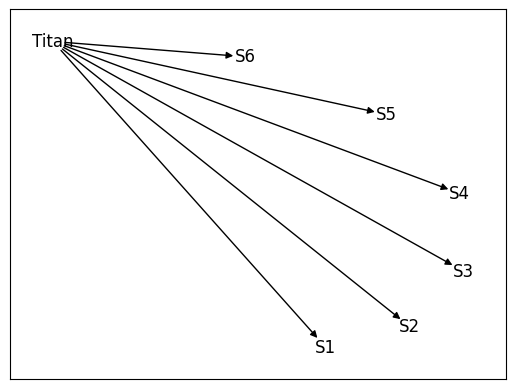

In [ ]:
#Make a plot
pos=nx.layout.spiral_layout(shf)
nx.draw_networkx_labels(shf,pos)
nx.draw_networkx_edges(shf,pos)
plt.show()


In [ ]:
#Put data on the cells
shf.GetCell('S1').SetDataAssignment(ps.Assignment('real',s1[3]))  # Actual pulse arrival time by the "clock"
shf.GetCell('S2').SetDataAssignment(ps.Assignment('real',s2[3]))
shf.GetCell('S3').SetDataAssignment(ps.Assignment('real',s3[3]))
shf.GetCell('S4').SetDataAssignment(ps.Assignment('real',s4[3]))
shf.GetCell('S5').SetDataAssignment(ps.Assignment('real',s5[3]))
shf.GetCell('S6').SetDataAssignment(ps.Assignment('real',s6[3]))
shf.GetCell('Titan').SetDataAssignment(ps.Assignment('real5',np.array([1020,1002,102,800,3]))) # Titan (only) has the bogus data


In [ ]:
#Maximally Extend all cells (Unless you know what matters!)
#shf.MaximallyExtendCell('S1')
#shf.MaximallyExtendCell('S2')
#shf.MaximallyExtendCell('S3')
#shf.MaximallyExtendCell('S4')
shf.MaximallyExtendCell('Titan')

In [ ]:
print(shf.ComputeConsistencyRadius())  #Starting point

9752.73110676411


In [ ]:
shf.GetCell('Titan').mOptimizationCell = True
#default, rest are false

In [ ]:
shf.FuseAssignment()
for nd in shf.nodes():
    print('Value at {} is {}'.format(nd,shf.GetCell(nd).mDataAssignment))
print('Consistency Radius: '+str(shf.ComputeConsistencyRadius()) )

Value at S1 is 1060
Value at S2 is 1140
Value at S3 is 1180
Value at S4 is 1180
Value at S5 is 1220
Value at S6 is 1220
Value at Titan is [1.00889149e+00 1.00459412e+00 9.98317396e-01 1.00002845e+03
 1.99963752e+00]
Consistency Radius: 0.01619384978052194
